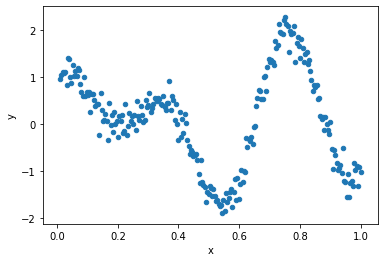

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sklearn
# from sklearn import train_test_split
# reading csv file  
df = pd.read_csv("data/ml-hw1.csv",)
df.plot(x='x',y='y',kind = 'scatter')
plt.show()

In [26]:
def regression(data_frame,learning_rate,steps,regularization_parameter,degree=6):
    data_x = df.iloc[:, 0:1].values
    data_y = df.iloc[:, 1].values
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(data_x, data_y, test_size=0.2, random_state=0)
    
    #-------------------
    poly_reg = sklearn.preprocessing.PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(data_x)
    pol_reg = sklearn.linear_model.LinearRegression()
    pol_reg.fit(X_poly, data_y)
    plt.scatter(data_x, data_y, color='red')
    plt.plot(data_x, pol_reg.predict(poly_reg.fit_transform(data_x)), color='blue')
    plt.title('Data and Prediction')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    return
regression(data_frame=df,degree=6,learning_rate=0.01,steps=100,regularization_parameter=2)

AttributeError: module 'sklearn' has no attribute 'model_selection'

In [ ]:
def gradiant_descent(learning_rate,theta):
    while converge:
        for t in theta:
            t = t - learning_rate. deriv(J(theta))
    

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

def normal_equation(data_frame):
    X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    y_predict = X_new_b.dot(theta_best)

In [ ]:
import numpy as np
from scipy import linalg
from collections import OrderedDict
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


x,y 
costs = []

def standardize(data):

    return (data - np.mean(data))/(np.max(data) - np.min(data))

def hypothesis(theta, x):

    h = theta[0]
    for i in np.arange(1, len(theta)):
        h += theta[i]*x ** i        
    return h        

def computeCost(x, y, theta,reg_lambda):

    errors = hypothesis(theta, x)-y
    reg = np.sum(theta**2)
    
    return (1/(2*len(y)))*np.sum(errors**2)  + reg_lambda*reg

def fit(method = 'normal_equation', order = 1, tol = 10**-3, numIters = 20, learningRate = 0.01,reg_lambda):
    theta = []
    if method == 'normal_equation': 
        d = {}
        d['x' + str(0)] = np.ones([1,len(x_pts)])[0]    
        for i in np.arange(1, order+1):                
            d['x' + str(i)] = x ** (i)        

        d = OrderedDict(sorted(d.items(), key=lambda t: t[0]))
        X = np.column_stack(d.values())  

        theta = np.matmul(np.matmul(linalg.pinv(np.matmul(np.transpose(X),X)), np.transpose(X)), y)

    elif method == 'gradient_descent':

        d = {}
        d['x' + str(0)] = np.ones([1,len(x_pts)])[0]    
        for i in np.arange(1, order+1):                
            d['x' + str(i)] = standardize(x ** (i))      

        d = OrderedDict(sorted(d.items(), key=lambda t: t[0]))
        X = np.column_stack(d.values())  

        m = len(x)
        theta = np.zeros(order + 1)           
        
        for i in range(numIters):

            h = hypothesis(theta, x)       
            errors = h-y
            theta += -learningRate * (1/m)*np.dot(errors, X)
            cost = computeCost(x, y, theta,reg_lambda)
            costs.append(cost)         
            if cost < tol:
                break      

    return theta

        